In [1]:
from classo import *

import numpy as np
import matplotlib.pyplot as plt

#### To generate the data :

In [2]:
m,d,d_nonzero,k,sigma =100,200,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=1)
np.nonzero(sol)

(array([  7,  63, 148, 164, 168]),)

#### To define the problem :

In [3]:
problem = classo_problem(X,y)

#### solve the problem with its default parameters :

In [4]:
problem.solve()

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Stability selection
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



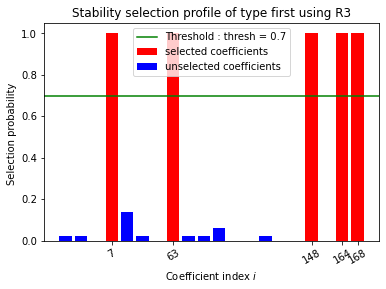

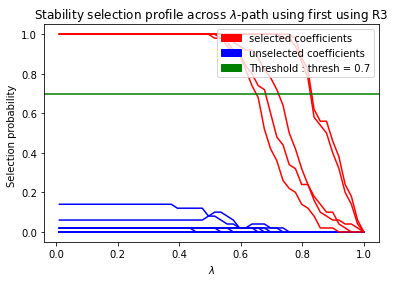

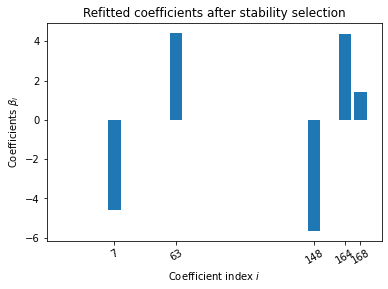


 STABILITY SELECTION : 
   Selected variables :  3    7    16    18    19    
   Running time :  0.735s



In [5]:
print(problem)

print(problem.solution)

#### Zarr storage

In [6]:
import zarr
root = zarr.group()
to_zarr(problem,'problem',root)
root.tree()

/
 ├── data
 │   ├── C (1, 200) float64
 │   ├── X (100, 200) float64
 │   ├── label (200,) <U3
 │   └── y (100,) float64
 ├── formulation
 ├── model_selection
 │   ├── CVparameters
 │   ├── LAMfixedparameters
 │   ├── PATHparameters
 │   └── StabSelparameters
 │       └── formulation
 └── solution
     └── StabSel
         ├── distribution (200,) float64
         ├── distribution_path (50, 200) float64
         ├── label (200,) <U3
         ├── lambdas_path (50,) float64
         ├── refit (200,) float64
         ├── selected_param (200,) bool
         └── to_label (200,) bool

#### To solve a problem different than the default parameters :

In [7]:
m,d,d_nonzero,k,sigma =100,200,5,0,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=4)
problem                                     = classo_problem(X,y,C)
problem.formulation.huber                   = False
problem.formulation.concomitant             = True

problem.model_selection.CV                  = True
problem.model_selection.LAMfixed            = True
problem.model_selection.PATH                = True
problem.model_selection.StabSel             = False
problem.model_selection.StabSelparameters.method = 'first'
problem.model_selection.CVparameters.seed = 1

problem.model_selection.LAMfixedparameters.rescaled_lam = True
problem.model_selection.LAMfixedparameters.lam = .1

In [8]:
np.nonzero(sol)

(array([ 17,  59,  76, 123, 137]),)

In [9]:
problem.solve()

#### To see information about the problem

In [10]:
problem

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.12
     lam = 0.1
     theoretical_lam = 0.224
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 80
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 

#### To plot the solutions, as graphs :

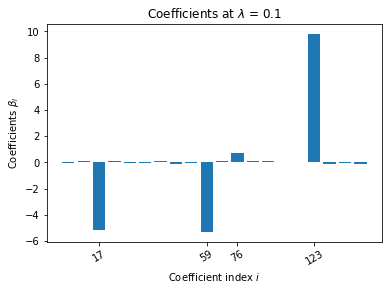

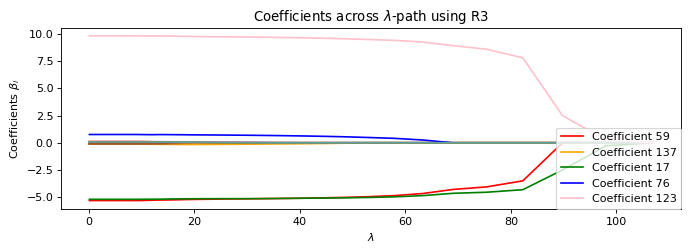

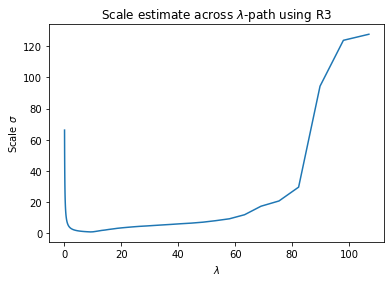

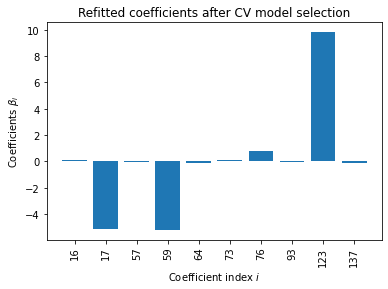

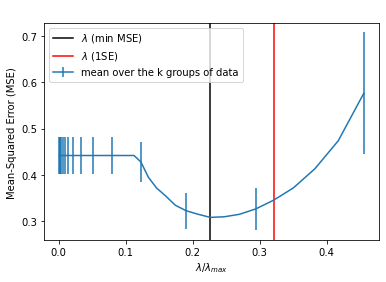


 LAMBDA FIXED : 
   Sigma  =  0.02
   Selected variables :  17    59    76    123    
   Running time :  0.111s

 PATH COMPUTATION : 
   Running time :  0.217s

 CROSS VALIDATION : 
   Selected variables :  16    17    57    59    64    73    76    93    123    137    
   Running time :  0.634s

In [11]:
problem.solution

In [12]:
root = zarr.group()
to_zarr(problem,'problem',root)
root.tree()

/
 ├── data
 │   ├── C (1, 200) float64
 │   ├── X (100, 200) float64
 │   ├── label (200,) <U3
 │   └── y (100,) float64
 ├── formulation
 ├── model_selection
 │   ├── CVparameters
 │   │   ├── formulation
 │   │   └── lambdas (80,) float64
 │   ├── LAMfixedparameters
 │   │   └── formulation
 │   ├── PATHparameters
 │   │   ├── formulation
 │   │   └── lambdas (80,) float64
 │   └── StabSelparameters
 └── solution
     ├── CV
     │   ├── beta (200,) float64
     │   ├── formulation
     │   ├── label (200,) <U3
     │   ├── refit (200,) float64
     │   ├── selected_param (200,) bool
     │   ├── standard_error (80,) float64
     │   ├── xGraph (80,) float64
     │   └── yGraph (80,) float64
     ├── LAMfixed
     │   ├── beta (200,) float64
     │   ├── formulation
     │   ├── label (200,) <U3
     │   ├── refit (200,) float64
     │   └── selected_param (200,) bool
     └── PATH
         ├── BETAS (80, 200) float64
         ├── LAMBDAS (80,) float64
         ├── SIGMAS (80,) float64
         ├── formulation
         └── label (200,) <U3